# Análisis de textos

In [1]:
%pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import num2words
import re, unicodedata, inflect
import nltk
from gensim.models import Word2Vec
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport

In [3]:
import warnings
warnings.filterwarnings("ignore")

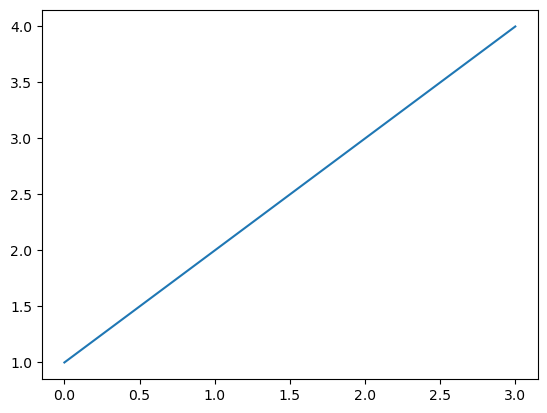

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [5]:
RECALL = "Recall:"
PRECISION = "Precision:"
F1 = "F1:"

In [6]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [7]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /home/leo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [9]:
ods_df = pd.read_csv("../data/cat_6716.csv")

In [10]:
ods_df.shape

(3000, 2)

In [11]:
ods_df.sample(5)

,Textos_espanol,sdg
2800,"El conflicto armado en el continente africano ha sido testigo de un creciente reclutamiento de niños soldados, a menudo a manos de grupos armados no estatales. Desafortunadamente, esta práctica continúa sin cesar frente a las obligaciones legales que prohíben el reclutamiento de niños soldados en virtud del derecho internacional humanitario y el derecho internacional y regional de derechos humanos. Si bien la condena internacional de la práctica ha dado lugar a intentos de aumentar la edad mínima para el reclutamiento a 18 años, persiste una disyuntiva entre las obligaciones legales que los estados suscriben y la aplicación real de estas prohibiciones a nivel nacional. La jurisprudencia de derecho penal internacional que emana del Tribunal Especial para Sierra Leona y la Corte Penal Internacional está siendo monitoreada de cerca, ya que estos tribunales buscan hacer cumplir la prohibición en todos los conflictos armados, y contra actores estatales y grupos armados no estatales. El derecho internacional humanitario solo protege a los niños soldados que han sido reclutados ilegalmente. En esta pieza, el au...",16
1820,"Como resultado, los estudios existentes sobre los impactos económicos de un accidente nuclear y, a fortiori, sobre el riesgo nuclear, pueden mostrar diferencias de varios órdenes de magnitud en cuanto a sus resultados. La mayor parte de los trabajos publicados y análisis cuantitativos sobre esta área se han realizado en las últimas décadas en el PSI. En particular, PSI ha sido el principal contribuyente al análisis comparativo de las externalidades debidas a accidentes severos realizado dentro del proyecto NEEDS de la UE, New Ext y SECURE, que constituyen hasta la fecha el esfuerzo más completo y detallado para caracterizar y cuantificar las externalidades en el sector energético. .",7
954,"El perfil de género de las muertes por diarrea debidas a la escasez de agua y saneamiento es consistente en la mayoría de las regiones: más hombres sufren y mueren por diarrea en todas partes excepto en el sudeste asiático, donde la proporción de muertes y enfermedades femeninas es notable y produce una inclinación global hacia un mayor número de muertes y AVAD femeninos en general (Tabla 2.2.1). La Organización Mundial de la Salud (OMS) estima que es la causa principal de alrededor del 28% de las muertes infantiles en todo el mundo (WaterAid 2009a). Entre los niños menores de cinco años, la diarrea es una de las principales causas de morbilidad y mortalidad, responsable del 20% del total de muertes en este grupo de edad (OMS 2015, Walker et al.",6
1076,"Esto muestra que la situación de la seguridad del suministro en los países de la OCDE ha mejorado inequívocamente desde principios de la década de 1970. Sin embargo, parámetros individuales como la dependencia de las importaciones y la volatilidad de los precios se destacan constantemente como cuestiones de interés público, en particular en las encuestas de opinión del Eurobarómetro que se publican periódicamente. Esto sugiere que la energía nuclear se considera más favorable si no se la promueve como un tema autónomo por sí mismo, sino que se la integra en el contexto de objetivos políticos más amplios, como garantizar la seguridad del suministro de energía o la reducción de las emisiones de gases de efecto invernadero.",7
233,"Existe una tasa uniforme en todo el país, sea cual sea el objetivo de calidad o la capacidad de dilución de las aguas receptoras (OCDE, 2008c). En virtud del principio de compensación reconocido en la legislación coreana, los ingresos recaudados de los beneficiarios aguas abajo se utilizan para compensar a los residentes aguas arriba por las pérdidas debidas a la regulación del uso del suelo, un paso importante hacia una gestión verdaderamente integrada del agua y el suelo a nivel de cuenca hidrográfica. En la UE y Estados Unidos se paga a los agricultores por diversas medidas de gestión medioambiental, como la reducción de la 

In [12]:
ods_df["sdg"].value_counts(dropna=False, normalize=True)

6     0.333333
7     0.333333
16    0.333333
Name: sdg, dtype: float64

In [13]:
textos = ods_df.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [pd.Series(x).value_counts().index[0] for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].astype(str)

## Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

<span style="color:red">!!! Antes de ver la solución, revisa alternativas para realizar las tres etapas previas.</span>

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

### Limpieza de los datos

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words.num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización

In [16]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(preprocessing).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
2040,capitulo ilustra reclamos actores disputa mar meridional china perspectiva derecho internacional posteriormente analiza enfoques gestion conflictos despues examinar antecedentes historicos disputa incluidos principales actores respectivos intereses capitulo evalua reclamos actores involucrados virtud derecho internacional particular interes respecto convencion naciones unidas derecho mar finalmente capitulo presenta podria llamarse enfoque spitsbergen plus ofrece enfoque innovador gestion conflictos mar china meridional,16
2315,sistemas justicia penal america latina experimentado profundas transformaciones decada mil novecientos ochenta sido impacto reformas justicia penal terminos acceso justicia adjudicacion derechos humanos si bien existen estudios analizan avances fracasos reformas judiciales general aun escasa investigacion empirica sistematica ayude evaluar nuevas instituciones derechos legales estan funcionando mejorar responsabilidad penal individual violaciones derechos humanos articulo traves enfoque metodo mixto exploro impacto reformas acceso justicia victimas violaciones derechos humanos,16
2745,seguridad ligada crecimiento desarrollo social politico economico nigeria negligencia sector seguridad responsable incumplimiento gobernabilidad democratica delitos violentos acompanan robo mano armada crisis etnica violencia electoral secuestro brutalidad policial etc relacion gobernabilidad democratica seguridad automatica nigeria documento utiliza fuentes datos disponibles metodo tecnica recopilacion datos analiza brechas faltan seguridad desarrollo documento presenta hallazgos sugiere recomendaciones cuales provision infraestructura adecuada buen gobierno derecho revision sector seguridad enfrentar desafios aplicacion ley prestacion servicios vigilancia proteccion creacion oportunidades empleo programas emprender reorientacion moral total ciudadanos doi 105901mjss2013v4n13p187,16
745,micro prespa compartida albania grecia mientras macro prespa compartida albania grecia antigua republica yugoslava macedonia lagos prespa ohrid forman parte misma cuenca hidrogeologica acuifero lagos prcspa ohrid status paper managen lent of extended tran tbouiklary drill basin,6
532,sistema clasico expresar contaminacion principalmente materia organica fuentes puntuales indice saprobiologico sistema tambien utiliza pais muestreo determinacion irregulares realiza facultad biologia universidad skopje incluso si presentacion mas antigua mapa 76 muestra claramente alta contaminacion aguas residuales clases calidad agua dominantes iii alfamesosaprob iv polisaprob especialmente debajo ciudades mas grandes skopje veles bitola stip asi rio vardar rio cma rio bregalnica,6


### Normalización

In [17]:
# def stem_words(words):
#     """Stem words in list of tokenized words"""
#     stemmer = nltk.stem.SnowballStemmer('spanish')
#     stems = [stemmer.stem(word) for word in words]
#     return stems

# def lemmatize_verbs(words):
#     """Lemmatize verbs in list of tokenized words"""
#     #Lemmatize for spanish
#     stemmer = nltk.stem.SnowballStemmer('spanish')
#     lemmas = [stemmer.stem(word) for word in words]
#     return lemmas
# def stem_and_lemmatize(words):
#     stems = stem_words(words)
#     lemmas = lemmatize_verbs(words)
#     return stems + lemmas

# ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(stem_and_lemmatize).apply(" ".join)
# ods_df.sample(5)

# Entrenamiento

In [18]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(ods_df[["Textos_espanol"]], ods_df["sdg"], test_size=0.3, stratify=ods_df["sdg"], random_state=1)

In [19]:
X_train_tokens = [nltk.word_tokenize(text) for text in X_train]
X_test_tokens = [nltk.word_tokenize(text) for text in X_test]

In [20]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

In [21]:
pd.Series(y_train).value_counts(normalize=True)

7     0.333333
6     0.333333
16    0.333333
Name: sdg, dtype: float64

In [22]:
pd.Series(y_test).value_counts(normalize=True)

6     0.333333
7     0.333333
16    0.333333
Name: sdg, dtype: float64

## Text vectorization

In [23]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [24]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

In [25]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 17624


In [26]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [27]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

In [28]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 17624


## Training a model with BoW

In [29]:
bow_model = RandomForestClassifier(random_state=2)

In [30]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<AxesSubplot: >

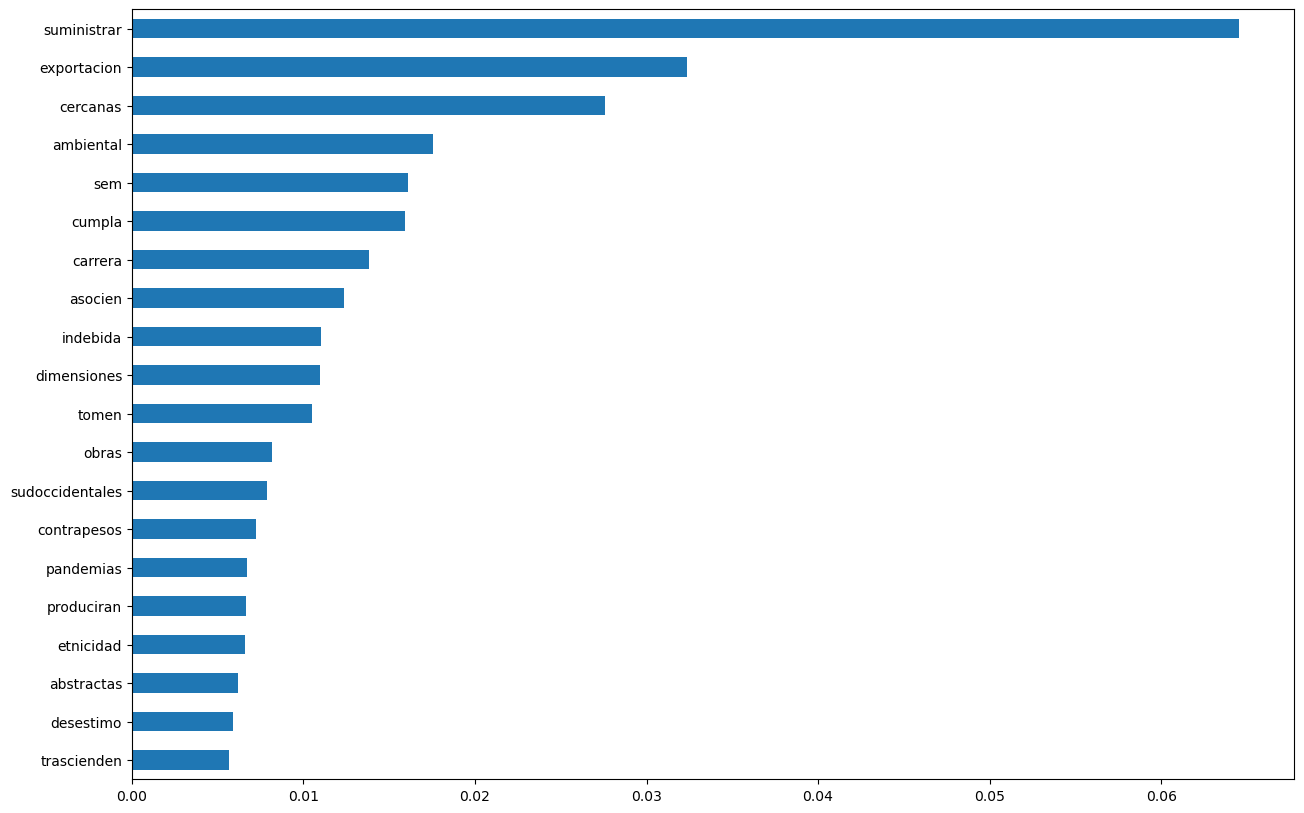

In [31]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [32]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 97.36


In [33]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

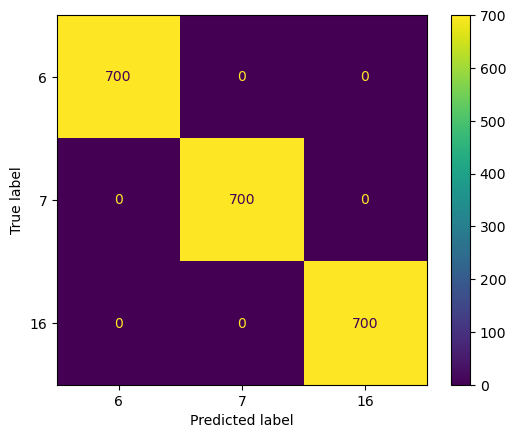

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

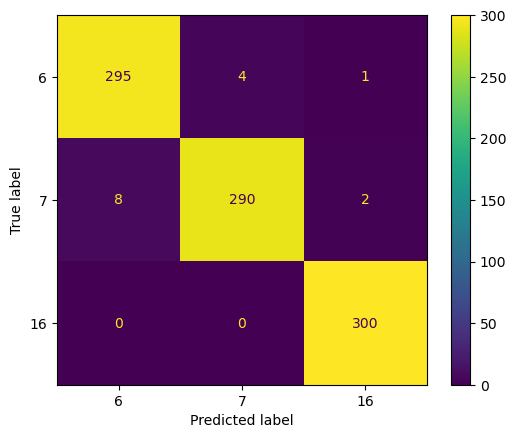

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [36]:
print(PRECISION, precision_score(y_train, y_train_bow_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_bow_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_bow_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
print(PRECISION, precision_score(y_test, y_test_bow_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_bow_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_bow_predict, average="weighted"))

Precision: 0.9833636424866977
Recall: 0.9833333333333333
F1: 0.983298993249242


## Training a model with TF-IDF

In [38]:
tfidf_model = RandomForestClassifier(random_state=3)

In [39]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<AxesSubplot: >

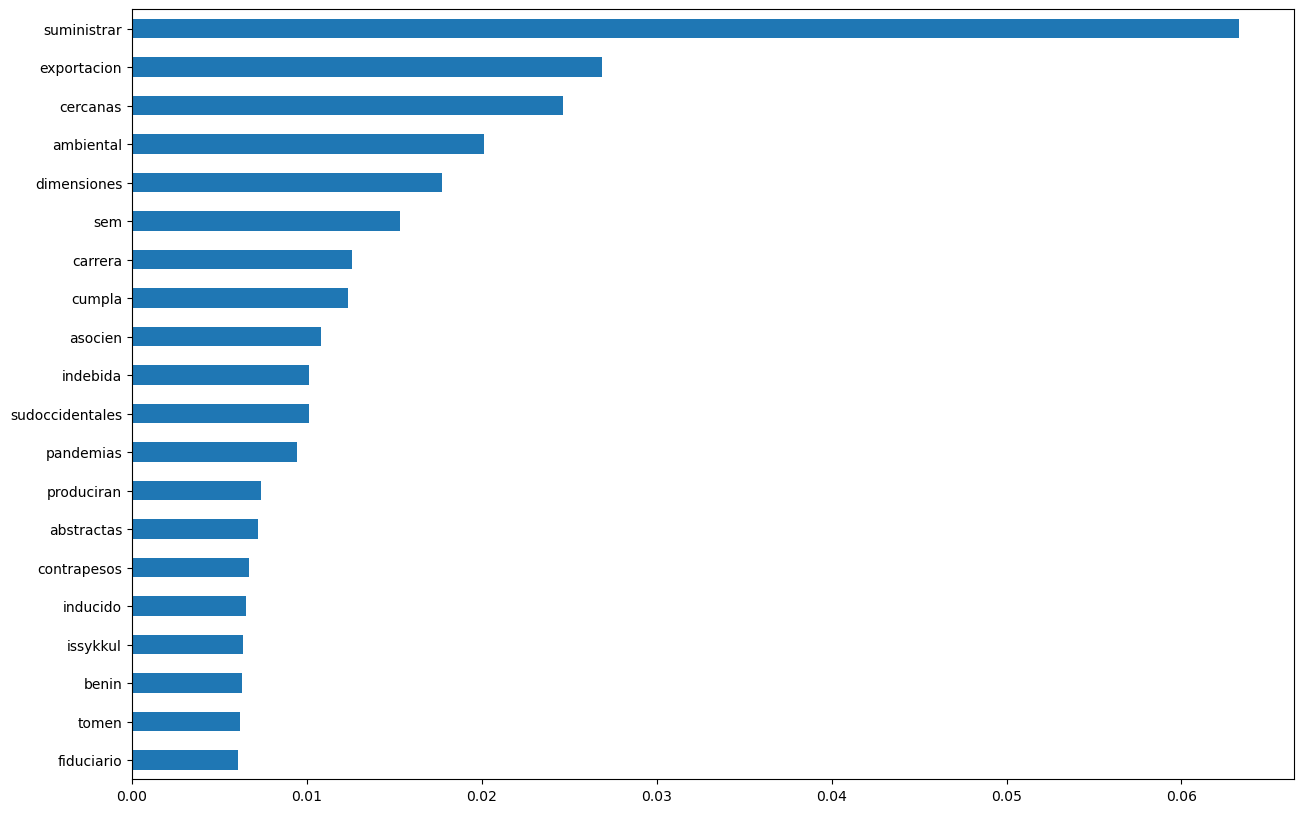

In [40]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [41]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 90.92


In [42]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

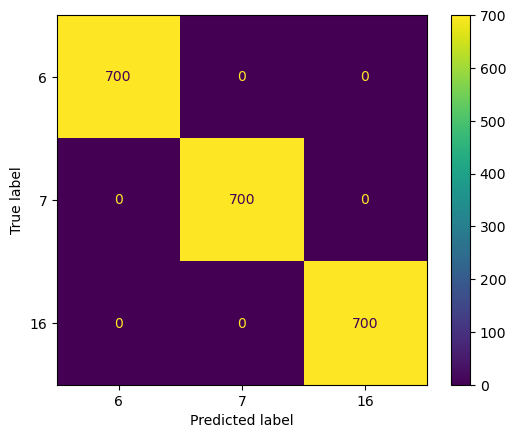

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

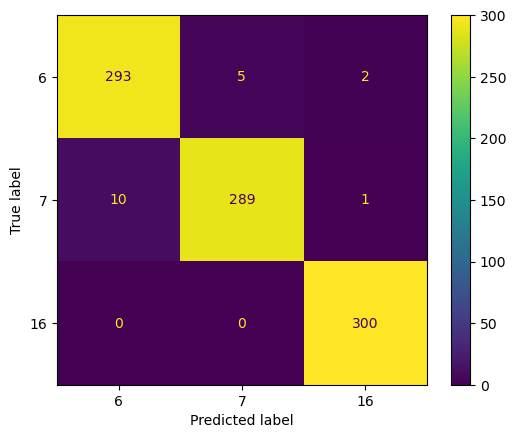

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [45]:
print(PRECISION, precision_score(y_train, y_train_tfidf_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_tfidf_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_tfidf_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [46]:
print(PRECISION, precision_score(y_test, y_test_tfidf_predict, average="weighted"))  
print(RECALL, recall_score(y_test, y_test_tfidf_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_tfidf_predict, average="weighted"))

Precision: 0.9800296356166228
Recall: 0.98
F1: 0.9799654924033034


## Training a model with SVM

In [47]:
# Vectorizar tus textos utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["Textos_espanol"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["Textos_espanol"])


In [48]:
# Entrenar un modelo SVM
svm_classifier = SVC(kernel="linear", C=1)  # Puedes ajustar los hiperparámetros según sea necesario
svm_classifier.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [49]:
coeficientes = abs(svm_classifier.coef_.toarray()[0]) 

In [50]:
nombres_caracteristicas = tfidf_vectorizer.get_feature_names_out()

In [51]:
df_coeficientes = pd.DataFrame({'Palabra': nombres_caracteristicas, 'Coeficiente': coeficientes})

In [52]:
df_coeficientes = df_coeficientes.sort_values(by='Coeficiente', key=np.abs, ascending=False)

In [53]:
palabras_importantes = df_coeficientes.head(10)

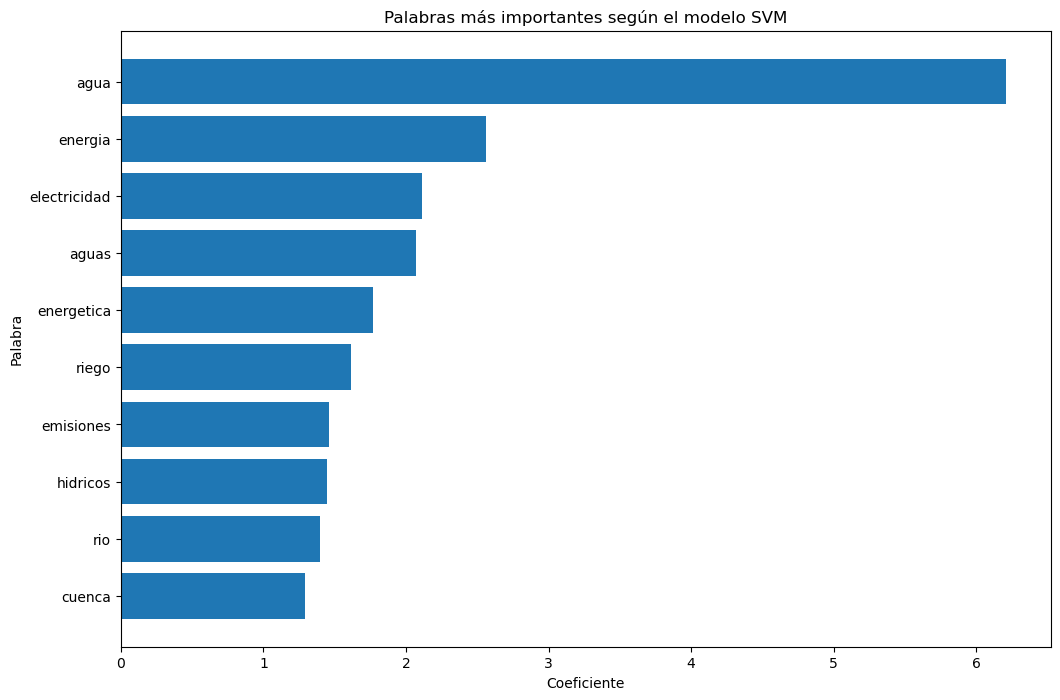

In [54]:
plt.figure(figsize=(12, 8))
plt.barh(palabras_importantes['Palabra'], palabras_importantes['Coeficiente'])
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Palabras más importantes según el modelo SVM')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más importantes en la parte superior
plt.show()

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_tfidf)


In [56]:
# Calcular las métricas para todo el conjunto de prueba
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Imprimir las métricas
print("Precisión promedio:", precision)
print("Recall promedio:", recall)
print("F1-score promedio:", f1)

Precisión promedio: 0.9866650861387704
Recall promedio: 0.9866666666666667
F1-score promedio: 0.9866366406408186


In [57]:
# Obtener predicciones en el conjunto de entrenamiento
y_train_pred_svm = svm_classifier.predict(X_train_tfidf)

# Calcular métricas de evaluación en el conjunto de entrenamiento
f1_svm_train = f1_score(y_train, y_train_pred_svm, average='weighted')
precision_svm_train = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_svm_train = recall_score(y_train, y_train_pred_svm, average='weighted')

print("F1 Score en conjunto de entrenamiento (SVM):", f1_svm_train)
print("Precisión en conjunto de entrenamiento (SVM):", precision_svm_train)
print("Recall en conjunto de entrenamiento (SVM):", recall_svm_train)

F1 Score en conjunto de entrenamiento (SVM): 0.998095234207961
Precisión en conjunto de entrenamiento (SVM): 0.9980979436566828
Recall en conjunto de entrenamiento (SVM): 0.9980952380952381


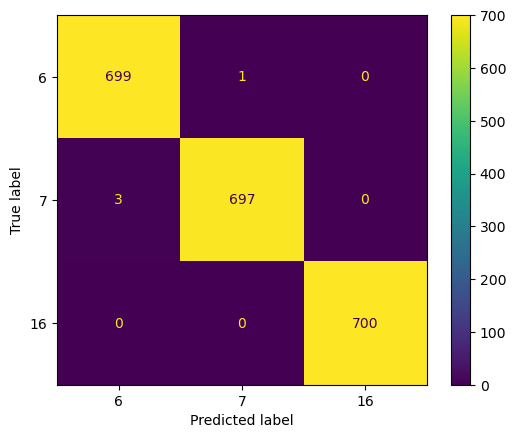

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm)

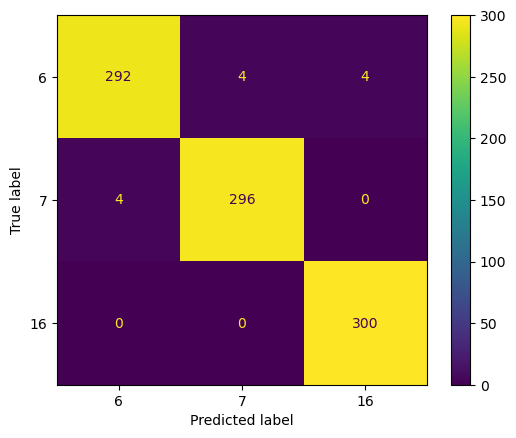

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Model selection

In [60]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4)),
])

In [61]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100], 
}


In [62]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=7, return_train_score=True, verbose=1, random_state=5)


In [63]:
search.fit(X_train["Textos_espanol"], y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x7fdb3b446b90>)),
                                             ('classifier',
                                              RandomForestClassif...
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                  

In [64]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(lowercase=False,
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fdb3b446b90>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [65]:
search.best_score_

nan

In [66]:
y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])


In [67]:
print(PRECISION, precision_score(y_train, y_train_search_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_search_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_search_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [68]:
print(PRECISION, precision_score(y_test, y_test_search_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_search_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_search_predict, average="weighted"))

Precision: 0.9866442224633991
Recall: 0.9866666666666667
F1: 0.9866499536880404


# Predicción y guardado de data

In [69]:
ods_df_unlabeled = pd.read_csv("../data/SinEtiquetatest_cat_6716.csv")
#Predict the labels of the unlabeled data
y_unlabeled_predict = search.best_estimator_.predict(ods_df_unlabeled["Textos_espanol"])
#Add the predicted labels to the unlabeled data
ods_df_unlabeled["sdg"] = y_unlabeled_predict
#Save the labeled data
ods_df_unlabeled.to_csv("../data/Predicted.csv", index=False)
